* Body Measurements of males and femal >= 18 years old [cm]
* Weight (kg)
* Standing Height (cm)
* Upper Arm Length (cm)
* Upper Leg Length (cm)
* Arm Circumference (cm)
* Hip Circumference (cm)
* Waist Circumference (cm)
* The US Centers for Disease Control and Prevention
* National Health and Nutrition Examination Survey
* Based on 2017-March 2020 Data on Body Measures (P_BMX) and
* Demographic Variables and Sample Weights (P_DEMO)
* Published: May 2021
* Description: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm
* and https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm
* License: public domain as per https://www.cdc.gov/other/agencymaterials.html

In [46]:
import pandas as pd

In [47]:
male=pd.read_csv(r"C:\corizo project work\New folder\nhanes_adult_male_bmx_2020.csv")
female=pd.read_csv(r"C:\corizo project work\New folder\nhanes_adult_female_bmx_2020.csv")
male.head()

,"""BMXWT""",BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0


In [48]:
female.head()

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2


### The datasets contain the expected columns, but the male dataset has an extra issue: the "BMXWT" column name has quotes around it. I'll clean the column names and convert both datasets into NumPy matrices.


####  Each row in the matrix represents a person, and the columns contain the following:

#### Weight (kg)
#### Standing Height (cm)
#### Upper Arm Length (cm)
#### Upper Leg Length (cm)
#### Arm Circumference (cm)
#### Hip Circumference (cm)
#### Waist Circumference (cm)

In [49]:
# clean column names for thwe male dataset
male.columns = male.columns.str.replace('"', '').str.strip()

# Convert to NumPy matrices
male = male.to_numpy()
female = female.to_numpy()

# Display the first few rows-
print("male Data: ",male[:6])
print("Female Data: ",female[:6])

# Display shapes to confirm successful conversion
female.shape, male.shape

male Data:  [[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]
 [ 90.2 162.5  38.7  38.   37.3 110.2 116.2]]
Female Data:  [[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]
 [ 62.  144.7  32.5  34.2  29.8 106.7  84.8]]


((4221, 7), (4081, 7))

#### Both datasets have been successfully converted into NumPy matrices:

* Female matrix: 4221 rows × 7 columns
* Male matrix: 4081 rows × 7 columns$$

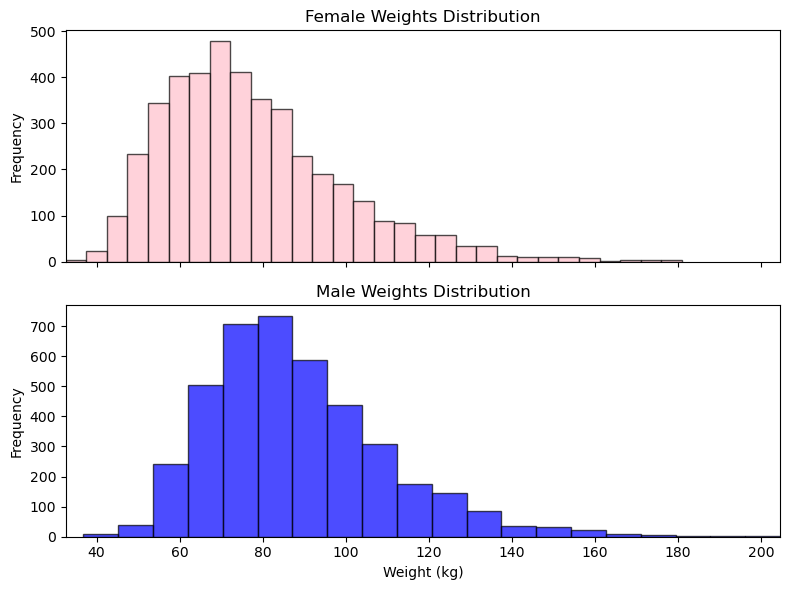

In [50]:
import matplotlib.pyplot as plt

# Extract weight columns
male_weights = male[:, 0]  
female_weights = female[:, 0]

# Determine X-axis limits
weight_min = min(female_weights.min(), male_weights.min())
weight_max = max(female_weights.max(), male_weights.max())

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)

# Plot female weights histogram
axes[0].hist(female_weights, bins=30, color='pink', edgecolor='black', alpha=0.7)
axes[0].set_title("Female Weights Distribution")
axes[0].set_ylabel("Frequency")

# Plot male weights histogram
axes[1].hist(male_weights, bins=20, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Male Weights Distribution")
axes[1].set_ylabel("Frequency")
axes[1].set_xlabel("Weight (kg)")

# set identical x-axis limits
plt.xlim(weight_min, weight_max)

# show plot
plt.tight_layout()
plt.show()


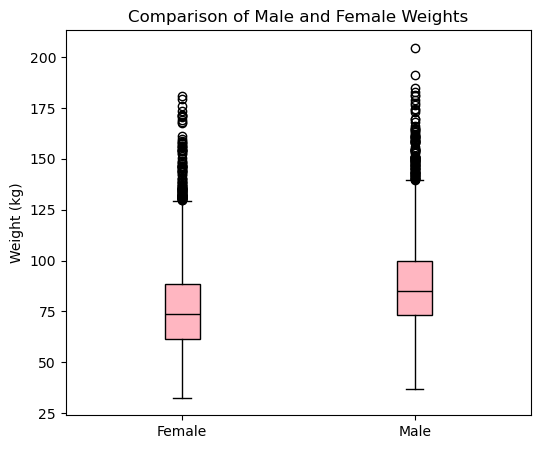

In [51]:
# Create a boxplot comparing female and male weights
plt.figure(figsize=(6, 5))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"], patch_artist=True,
            boxprops=dict(facecolor="lightpink"), medianprops=dict(color="black"))

# set title and labels
plt.title("Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")

plt.show()


#### The boxplot visually compares the weight distributions of males and females:
* Meadian: The meadian male weights is higher than the median feamale weight.
* Interquartile Range (IQR): The spread (middle 50% 0f data) is wider for males, suggesting more variability in weight.
* Whiskers: The male weight range extends further then the female rang, showing that men generally have a broader distribution of weight.
* Outliers: Any points beyond the whiskers indicate individuals with significantly different weights from the majority.


In [52]:
from scipy.stats import skew, kurtosis
import numpy as np

# compute statistics for female weights
female_mean = np.mean(female_weights)
female_median = np.median(female_weights)
female_std = np.std(female_weights, ddof=1)
female_skew = skew(female_weights)
female_kurt = kurtosis(female_weights)

# compute statistics for male weights
male_mean = np.mean(male_weights)
male_median = np.median(male_weights)
male_std = np.std(male_weights)
male_skew = skew(male_weights)
male_kurt = kurtosis(male_weights)

# Display results
stats_summary = pd.DataFrame({"statistic":["mean","median","standard Deviation","skewnees","kurtosis"],
                              "Feamale Weights": [female_mean, female_median, female_std, female_skew, female_kurt],
                              "Male Weights": [male_mean, male_median, male_std, male_skew, male_kurt]})

stats_summary

,statistic,Feamale Weights,Male Weights
0,mean,77.403791,88.364543
1,median,73.600000,85.000000
2,standard Deviation,21.545061,21.418937
3,skewnees,1.033361,0.984281
4,kurtosis,1.400968,1.474288


### Analysis of male and Female Weight Distributions:
#### 1. Measures of Location (Central Tendency):
* Meane Weight: male(88.36 kg) weigh more on average than females (77.40 kg).
* median Weight: The median for males (85.00 kg) is also higher than for females (73.60).
* Since the mean is slightly higher than the median in both cases, both distributions are slightly right-skewed.
#### 2. Measures of Dipersion:
* standard deviation: males (21.42 kg) and females (21.55 kg) have almost the same varibility in weight, meaning both distribution are out similarly.
#### 3. Shape (Skewness & Kurtosis):
* Skewness: Both distributions are positively skewed (rigt-skewed),meaning there are a few individuals with significantly higher weights.
* Kurtosis: Both distributions have akurtosis value above 0,indicating lightly heavy tails, meaning a small number of extreme values exist.
### Comparison:
* Both distributions are right-skewed, meaning some individuals have significantly higher weights.
* Dispersion is similar, so weight variability is roughly equal for both groups.
* Male have higher central tendency values, confirming that they generally weigh more than females.

In [55]:
import numpy as np
# Calculate BMI: BMI = weight (kg) / (height (m))^2
female_bmi = female[:,0]/((female[:,1]/100)**2)  # Convert height from cm to meter

# add BMI as the 8th column to the female matrix
female = np.column_stack((female, female_bmi))

# Display the new shape to confirm the addtion
female.shape

(4221, 8)

In [64]:
# compute the z-scores for each column in the female matrix
zfemale = (female - female.mean(axis=0))/female.std(axis=0, ddof=1)

zfemale.shape

(4221, 8)

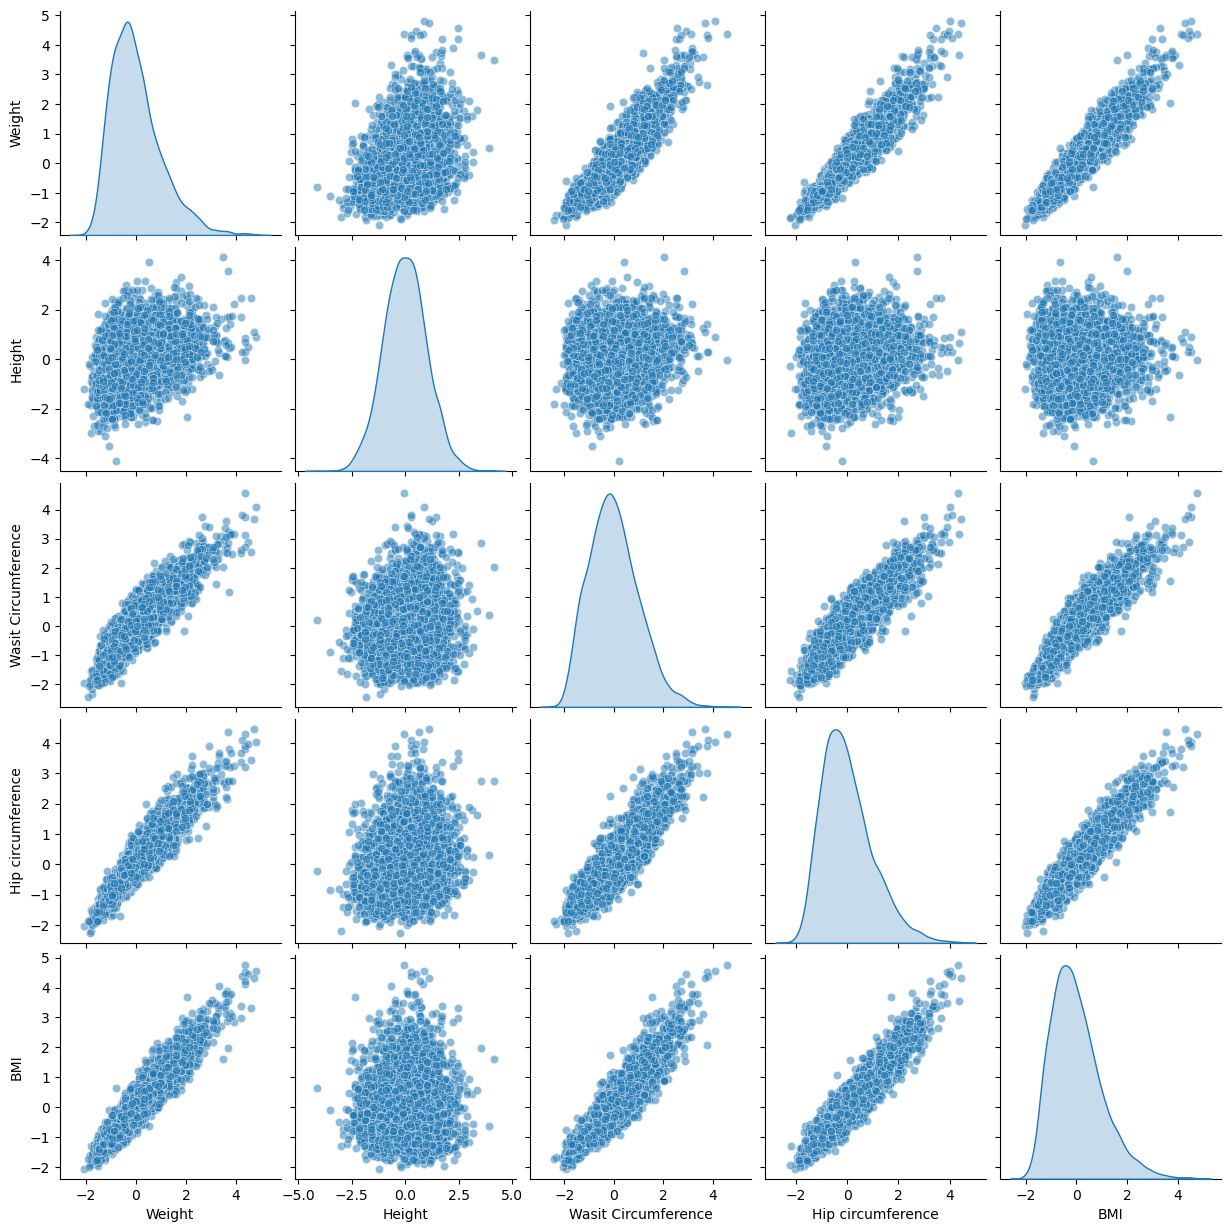

In [65]:
import seaborn as sns
import warnings

# select the standardized columns: weight, height, waist, hip, BMI
zfemale_subset = zfemale[:,[0,1,6,5,7]]

# convert to DataFrame for visualization and correlation analysis
columns = ["Weight","Height","Wasit Circumference",
           "Hip circumference","BMI"]
zfemale = pd.DataFrame(zfemale_subset, columns=columns)

# plot scatterpolt matrix (pairplot)
sns.pairplot(zfemale,diag_kind='kde',plot_kws={'alpha':0.5})
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.show()

In [66]:
# compute pearson correlation coefficients
pearson_corr = zfemale.corr(method='pearson')
pearson_corr

,Weight,Height,Wasit Circumference,Hip circumference,BMI
Weight,1.000000,0.345496,0.904550,0.946553,0.945900
Height,0.345496,1.000000,0.126547,0.202895,0.033077
Wasit Circumference,0.904550,0.126547,1.000000,0.897407,0.921198
Hip circumference,0.946553,0.202895,0.897407,1.000000,0.944199
BMI,0.945900,0.033077,0.921198,0.944199,1.000000


In [67]:
# compute spearman correlation coefficients
spearman_corr = zfemale.corr(method='spearman')
spearman_corr

,Weight,Height,Wasit Circumference,Hip circumference,BMI
Weight,1.000000,0.338860,0.900169,0.946634,0.937999
Height,0.338860,1.000000,0.108587,0.205405,0.019897
Wasit Circumference,0.900169,0.108587,1.000000,0.888037,0.923114
Hip circumference,0.946634,0.205405,0.888037,1.000000,0.934196
BMI,0.937999,0.019897,0.923114,0.934196,1.000000


In [68]:
# Compute waist-to-height ratio and waist-to-hip ratio for females
waist_to_height_female = female[:, 6] / female[:, 1]  # Waist / Height
waist_to_hip_female = female[:, 6] / female[:, 5]     # Waist / Hip

# Append the new columns to the female matrix
female = np.column_stack((female, waist_to_height_female, waist_to_hip_female))

# Compute waist-to-height ratio and waist-to-hip ratio for males
waist_to_height_male = male[:, 6] / male[:, 1]  # Waist / Height
waist_to_hip_male = male[:, 6] / male[:, 5]     # Waist / Hip

# Append the new columns to the male matrix
male = np.column_stack((male, waist_to_height_male, waist_to_hip_male))

# Display the updated shapes of the matrices
female.shape, male.shape

((4221, 10), (4081, 9))

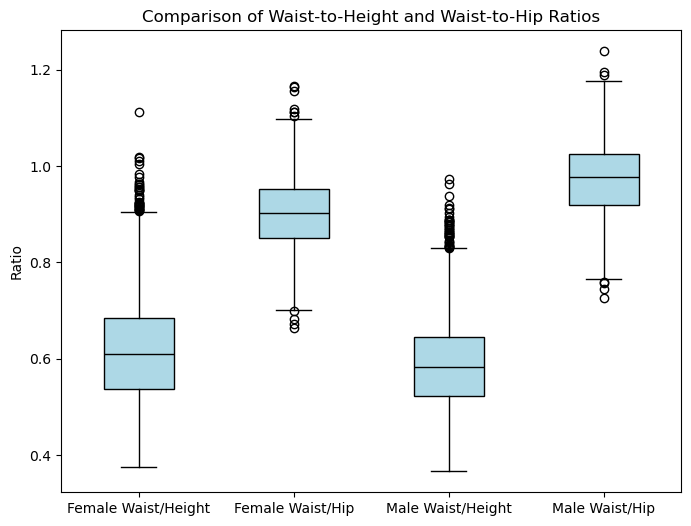

In [69]:
import matplotlib.pyplot as plt

# Prepare data for boxplot
data = [waist_to_height_female,waist_to_hip_female,waist_to_height_male,waist_to_hip_male]
labels = ["Female Waist/Height", "Female Waist/Hip", "Male Waist/Height", "Male Waist/Hip"]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), medianprops=dict(color="black"))

# Set title and labels
plt.title("Comparison of Waist-to-Height and Waist-to-Hip Ratios")
plt.ylabel("Ratio")

# Show plot
plt.show()


### Interpretation of the Boxplot:
#### 1. Waist-to-Height Ratio:

* Typically, a waist-to-height ratio above 0.5 is associated with higher health risks.
* The median value for males might be higher than for females, indicating potential differences in fat distribution.
#### 2.Waist-to-Hip Ratio:

* A higher waist-to-hip ratio is often linked to central obesity.
* The distribution for males and females could differ, with females generally having a lower ratio due to broader hips.

### Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio
#### 1. Body Mass Index (BMI)
##### Advantages:

* Simple and easy to calculate using only weight and height.
* Widely used in health assessments and research.
* Provides a general indication of underweight, normal weight, overweight, or obesity.
##### Disadvantages:

* Does not differentiate between fat and muscle (e.g., an athlete may have a high BMI but low body fat).
* Does not consider fat distribution (e.g., visceral vs. subcutaneous fat).
* Less accurate for certain groups (e.g., elderly, muscular individuals).

#### 2. Waist-to-Height Ratio (WHtR)
##### Advantages:

* More effective at identifying central obesity than BMI.
* Stronger predictor of health risks such as cardiovascular disease and diabetes.
* Works well across different ethnicities and body types.
##### Disadvantages:

* Less commonly used in clinical practice compared to BMI.
* Does not consider overall body composition.
* May be affected by posture and bloating when measured.

#### 3. Waist-to-Hip Ratio (WHR)
##### Advantages:

* Helps differentiate between "apple-shaped" (more abdominal fat) and "pear-shaped" (more lower-body fat) individuals.
* A good indicator of central obesity and related health risks.
* More informative for metabolic and cardiovascular health risks than BMI alone.
##### Disadvantages:

* Measuring the waist and hip accurately can be inconsistent.
* Not as widely recognized in medical guidelines as BMI.
* Does not directly assess overall body fat percentage.

#### Summary
* BMI is useful for general population studies but does not account for fat distribution.
* Waist-to-Height Ratio is a strong predictor of obesity-related health risks and may be better than BMI.
* Waist-to-Hip Ratio is useful for identifying central obesity but has measurement inconsistencies